In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('UFO_sightings_cleand.csv')

In [3]:
# changing name of date column
df = raw_data.rename(columns={'datetime':'date seen'})

In [4]:
df.head()

,date seen,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333


In [5]:
# checking for different countries in dataset
df['country'].unique()

array(['us', 'ca', 'au', 'gb'], dtype=object)

In [6]:
df['state'].unique()

array(['tx', 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky', 'mi',
       'ma', 'ks', 'sc', 'wa', 'co', 'nh', 'wi', 'me', 'ga', 'pa', 'il',
       'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf', 'ne', 'or',
       'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok', 'ak', 'ri',
       'nb', 'vt', 'la', 'nd', 'pr', 'ms', 'ut', 'md', 'ab', 'mt', 'sk',
       'wy', 'sd', 'de', 'pq', 'nt', 'qc', 'sa', 'ns', 'pe', 'yk', 'yt',
       'dc'], dtype=object)

In [7]:
# creating variables for plot
state = df.state.value_counts()
state_label = state.index
state_count = state.values

In [8]:
# plotting function
def plot(x,y):
    plt.subplots(figsize=(30,10))
    sns.barplot(x=x,y=y,palette="GnBu_d")

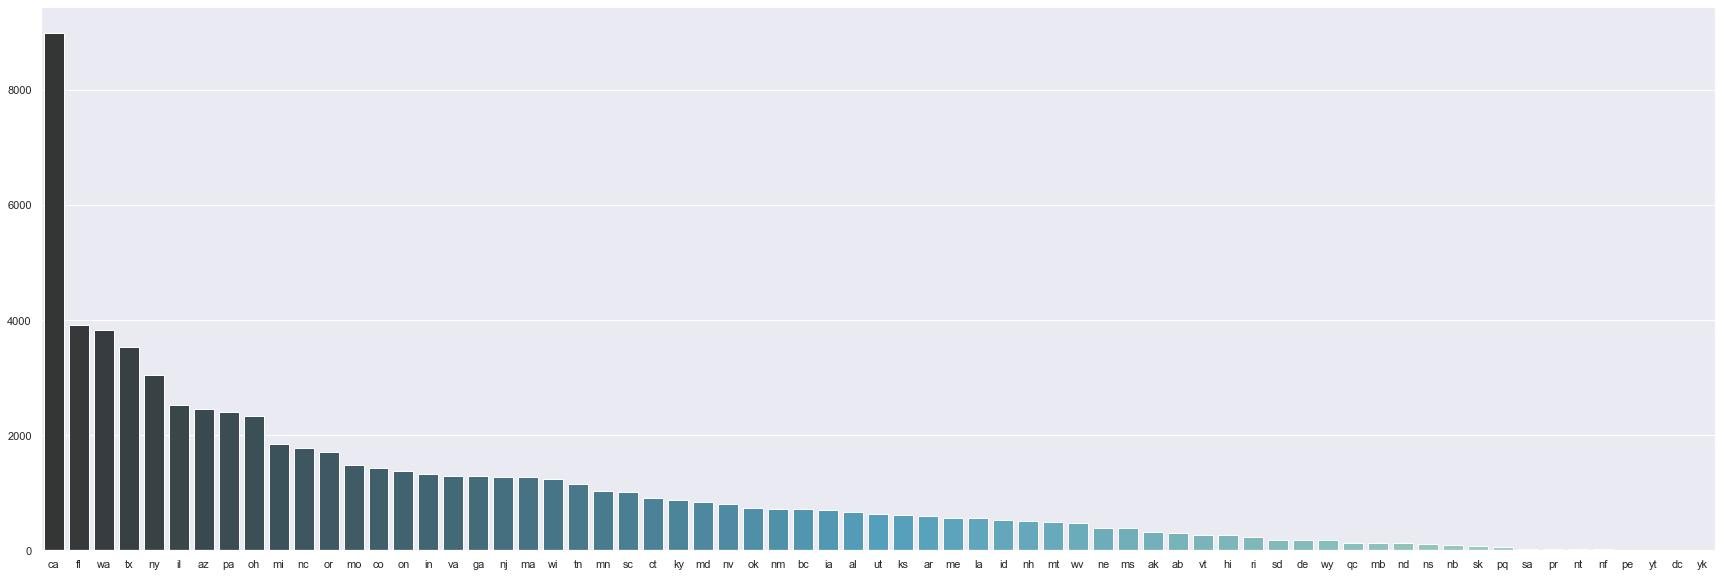

In [9]:
plot(state_label, state_count)

### Interesting to see how far down New Mexico is. With area 51, one would think there would be more sightings there.

In [10]:
# preparing date for plot
date_seen = pd.to_datetime(df['date seen'])

In [11]:
year = date_seen.dt.year

In [12]:
year_counts = year.value_counts()
year_label = year_counts.index
year_count = year_counts.values

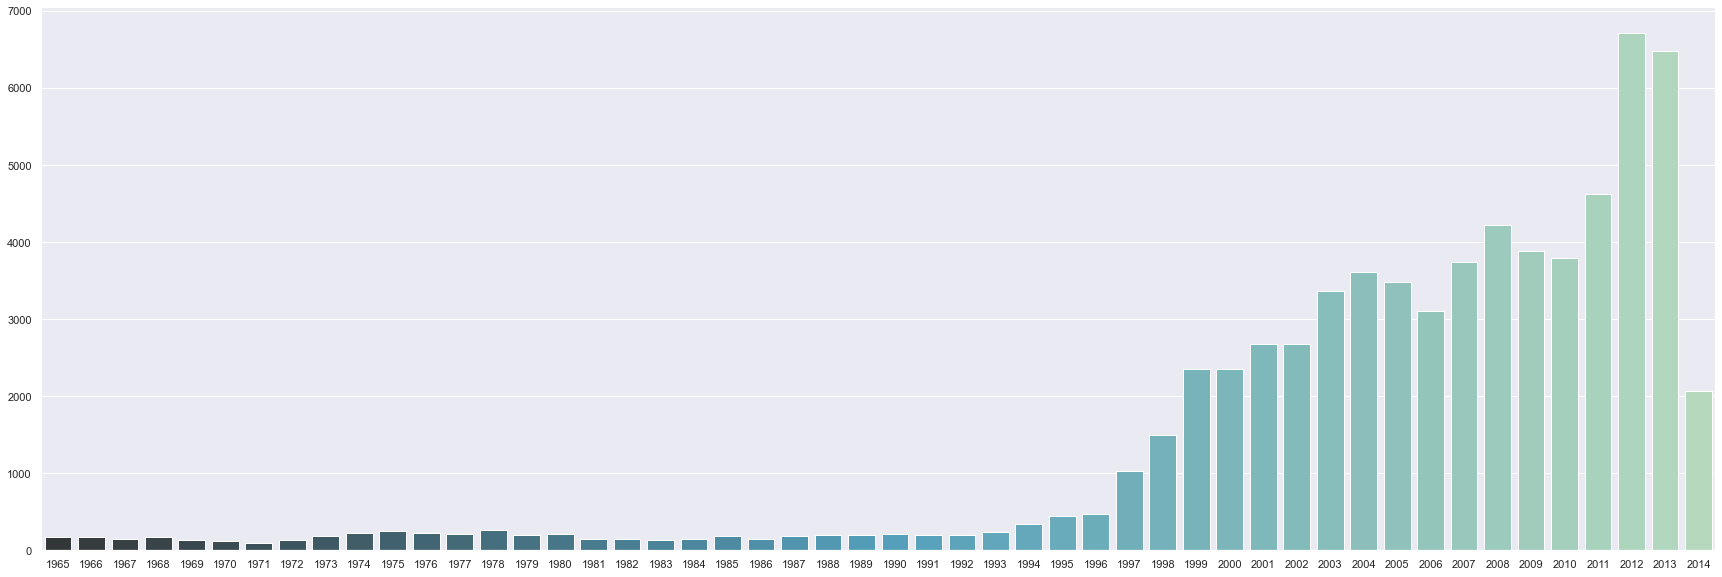

In [13]:
plot(year_label[:50], year_count[:50])

### As the internet became more popular, in the 90's the reported sightings started to spike. It is  possible this sparked an interst in watching for UFO and reporting them, creating a huge spike and largest reporting in 2013

In [14]:
# creating variables for shape plot
shape = df['shape'].value_counts()
shape_label = shape.index
shape_count = shape.values

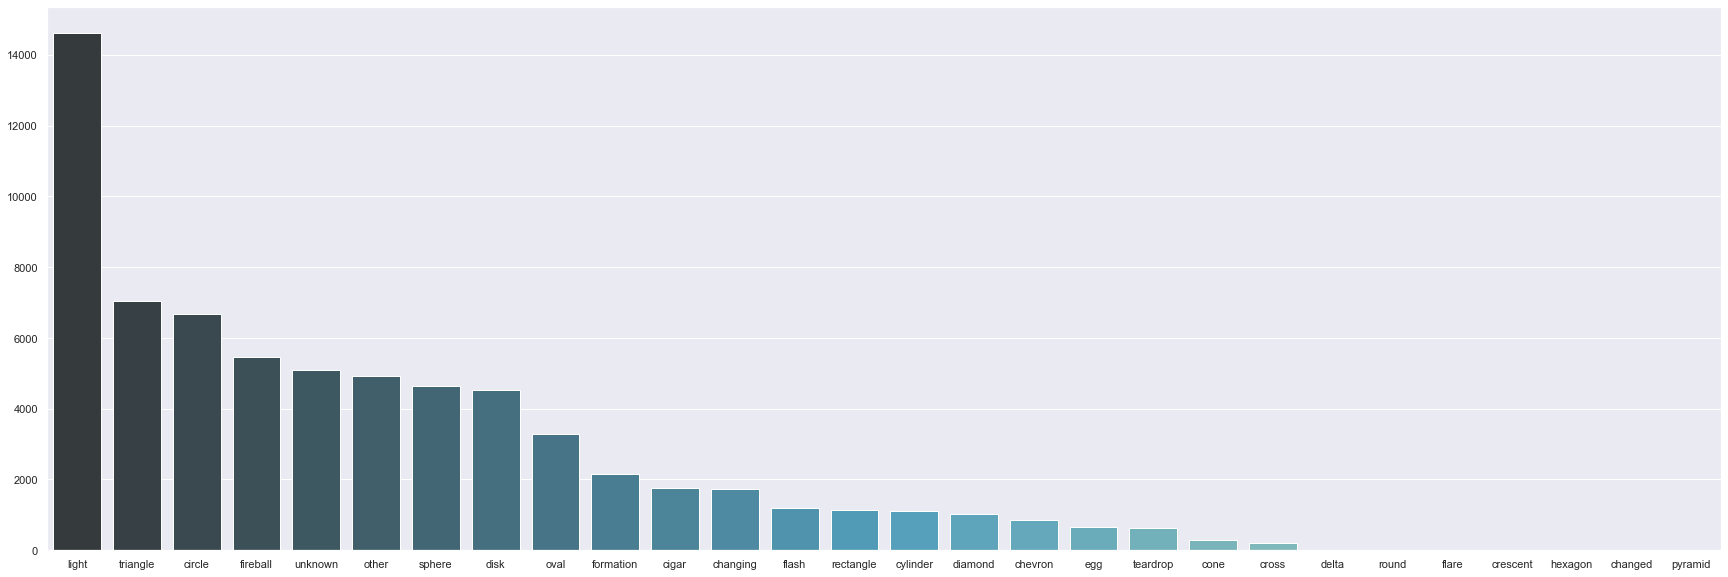

In [15]:
plot(shape_label, shape_count)

In [16]:
# combining similar categories
df['shape'] = df['shape'].replace(['unknown', 'other'], 'misc.')
df['shape'] = df['shape'].replace(['changed'], 'changing')

In [17]:
shape = df['shape'].value_counts()
shape_label = shape.index
shape_count = shape.values

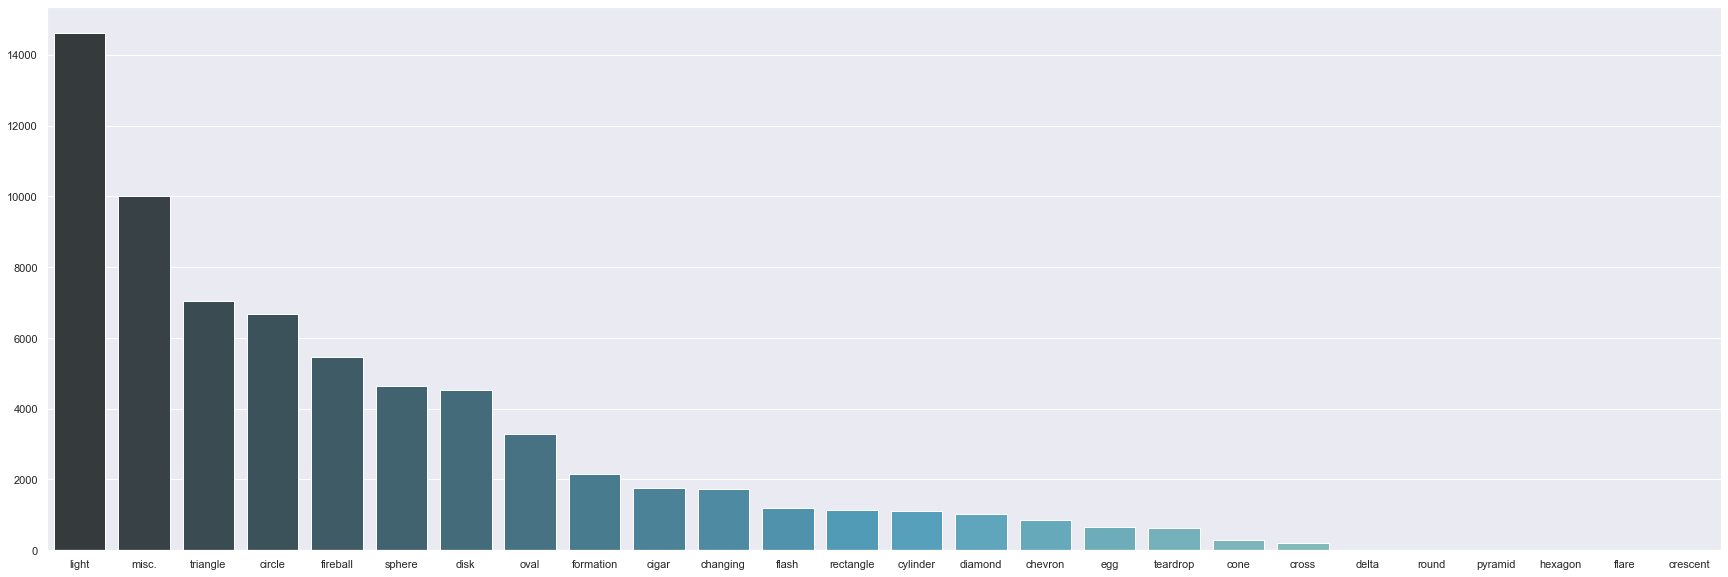

In [18]:
plot(shape_label,shape_count)

#### Light in the sky, or unknown or indesciribable sightings are the most reported ones. This could be due to time between sighting and reporting, sighting not being in preset categories, or influence of drugs or alcohol.

In [19]:
# creating variables for country plot
country = df.country.value_counts()
country_label = country.index
country_count = country.values

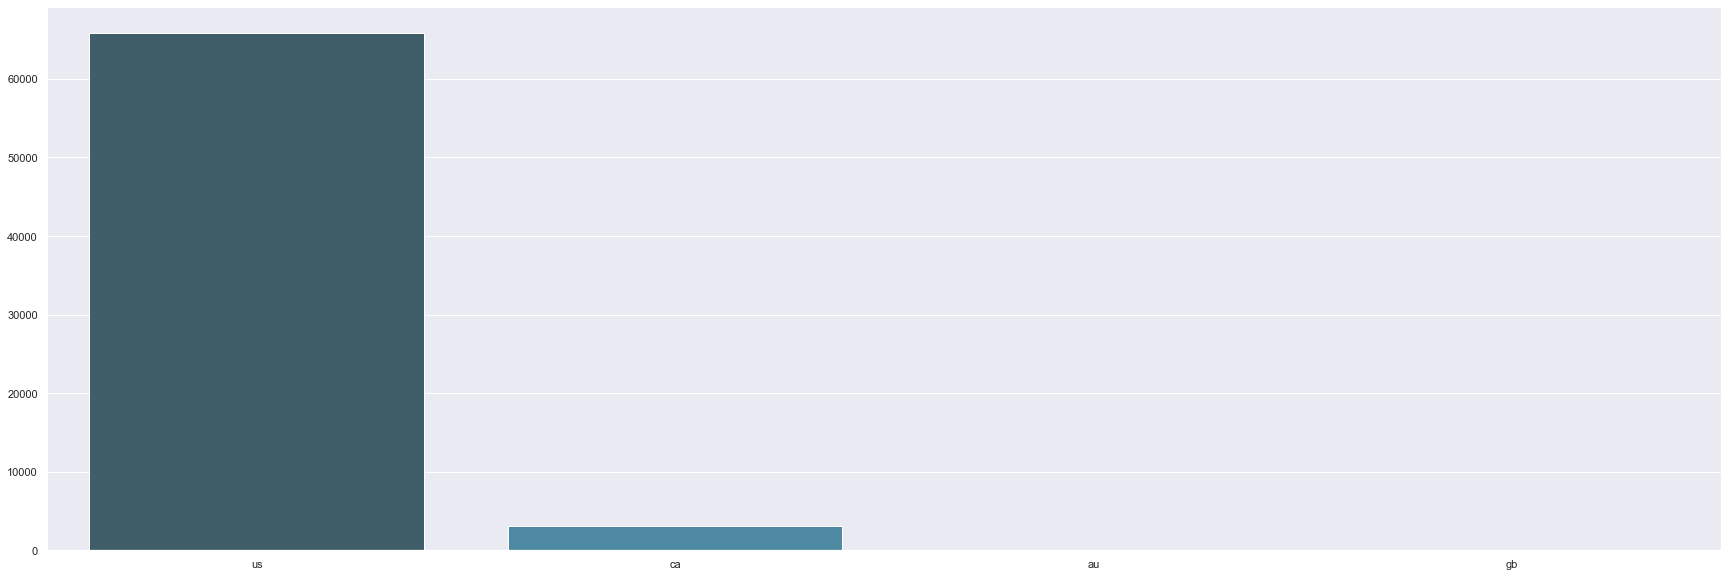

In [20]:
plot(country_label, country_count)

### USA is the most popular country to have UFO sightings. This could caused by the popularity of Area 51, a cultural interest in the paranormal and extraterrorestrial, or even a lack of reportability in other countries. 